### Activity 2
### 63010026 กฤตศยา นทีมณฑล

### 63010339 ณัฐวดี ติณภูมิ

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

In [324]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")

In [325]:
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [326]:
df.sample

<bound method NDFrame.sample of       customerID  gender  SeniorCitizen  tenure  ServiceCount        Contract  \
0     7590-VHVEG  Female              0       1             2  Month-to-month   
1     5575-GNVDE    Male              0      34             4        One year   
2     3668-QPYBK    Male              0       2             4  Month-to-month   
3     7795-CFOCW    Male              0      45             4        One year   
4     9237-HQITU  Female              0       2             2  Month-to-month   
...          ...     ...            ...     ...           ...             ...   
7038  6840-RESVB    Male              0      24             8        One year   
7039  2234-XADUH  Female              0      72             7        One year   
7040  4801-JZAZL  Female              0      11             2  Month-to-month   
7041  8361-LTMKD    Male              1       4             3  Month-to-month   
7042  3186-AJIEK    Male              0      66             7        Two year

In [327]:
df.drop(columns=['customerID'],inplace=True)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7016 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [329]:
df.fillna(0)

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.50,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.30,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [330]:
columns=['tenure','ServiceCount','MonthlyCharges','TotalCharges' ]

In [331]:
df2 = df[columns]
df2

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.50
2,2,4,53.85,108.15
3,45,4,42.30,1840.75
4,2,2,70.70,151.65
...,...,...,...,...
7038,24,8,84.80,1990.50
7039,72,7,103.20,7362.90
7040,11,2,29.60,346.45
7041,4,3,74.40,306.60


In [332]:
df_corr=df2.corr()

<AxesSubplot:>

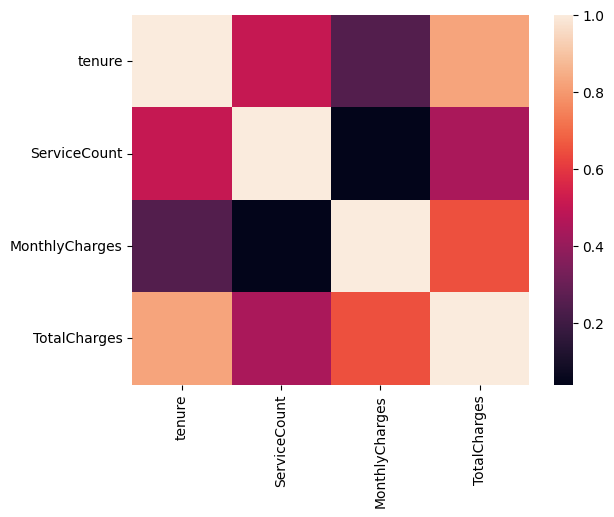

In [333]:
sns.heatmap(df_corr)

In [334]:
lower = pd.DataFrame(np.tril(df_corr, -1),columns = df_corr.columns)

In [335]:
print(lower)

     tenure  ServiceCount  MonthlyCharges  TotalCharges
0  0.000000      0.000000        0.000000           0.0
1  0.508526      0.000000        0.000000           0.0
2  0.247900      0.041463        0.000000           0.0
3  0.826066      0.443768        0.650964           0.0


In [336]:
#remove ถ้า >0.6
to_drop = [column for column in lower if any(lower[column] > 0.6)]
df2.drop(to_drop, inplace=True, axis=1)

C:\Users\ROG\AppData\Local\Temp\ipykernel_12256\3083106010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(to_drop, inplace=True, axis=1)


In [337]:
df2

,ServiceCount,TotalCharges
0,2,29.85
1,4,1889.50
2,4,108.15
3,4,1840.75
4,2,151.65
...,...,...
7038,8,1990.50
7039,7,7362.90
7040,2,346.45
7041,3,306.60


In [338]:
df2.describe()

,ServiceCount,TotalCharges
count,7043.000000,7016.000000
mean,5.446259,2282.589168
std,1.964916,2265.506114
min,1.000000,18.800000
25%,4.000000,401.925000
50%,6.000000,1397.100000
75%,7.000000,3792.325000
max,9.000000,8684.800000


In [339]:
columns1=['Churn']
columns2=['gender','PaperlessBilling','Contract']
df3 = df[columns1]
df4 = df[columns2]

In [340]:
df3

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [341]:
df4

,gender,PaperlessBilling,Contract
0,Female,Yes,Month-to-month
1,Male,No,One year
2,Male,Yes,Month-to-month
3,Male,No,One year
4,Female,Yes,Month-to-month
...,...,...,...
7038,Male,Yes,One year
7039,Female,Yes,One year
7040,Female,Yes,Month-to-month
7041,Male,Yes,Month-to-month


In [342]:
le=preprocessing.LabelEncoder()
df3['Churn'] = le.fit_transform(df3['Churn'])
df4['gender'] = le.fit_transform(df4['gender'])
df4['PaperlessBilling'] = le.fit_transform(df4['PaperlessBilling'])
df4['Contract'] = le.fit_transform(df4['Contract'])


C:\Users\ROG\AppData\Local\Temp\ipykernel_12256\4192753001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Churn'] = le.fit_transform(df3['Churn'])
C:\Users\ROG\AppData\Local\Temp\ipykernel_12256\4192753001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['gender'] = le.fit_transform(df4['gender'])
C:\Users\ROG\AppData\Local\Temp\ipykernel_12256\4192753001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [343]:
df3

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [344]:
df4

,gender,PaperlessBilling,Contract
0,0,1,0
1,1,0,1
2,1,1,0
3,1,0,1
4,0,1,0
...,...,...,...
7038,1,1,1
7039,0,1,1
7040,0,1,0
7041,1,1,0


In [345]:
#Output = ['Churn']
#Variables = ['gender','Contract','PaperlessBilling']

In [346]:
df_Output = df3.copy()
df_Variables = df4.copy()

In [347]:
df_Output

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [348]:
df_Variables

,gender,PaperlessBilling,Contract
0,0,1,0
1,1,0,1
2,1,1,0
3,1,0,1
4,0,1,0
...,...,...,...
7038,1,1,1
7039,0,1,1
7040,0,1,0
7041,1,1,0


In [349]:
Chi_table = chi2(df_Variables,df_Output)
print(Chi_table)

(array([2.58698618e-01, 1.05680863e+02, 1.11578017e+03]), array([6.11015635e-001, 8.66198711e-025, 1.22794132e-244]))


In [350]:
p_value = Chi_table[1]
p_value = pd.DataFrame(p_value,columns=['p_value'])
#lower = pd.DataFrame(np.tril(p_value, -1),columns = p_value.columns)
p_value = pd.DataFrame(list(zip([Chi_table[1][0]], [Chi_table[1][1]], [Chi_table[1][2]])), columns = ['gender', 'PaperlessBilling' ,'Contract'])
to_drop = [column for column in p_value if any(p_value[column] > 0.05)]
print(to_drop)

['gender']


In [351]:
print(p_value)

     gender  PaperlessBilling       Contract
0  0.611016      8.661987e-25  1.227941e-244


In [352]:
print(to_drop)

['gender']


In [353]:
df_Variables.drop(to_drop, inplace=True, axis=1)
df_Variables

,PaperlessBilling,Contract
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
7038,1,1
7039,1,1
7040,1,0
7041,1,0


In [354]:
df_result = df2.join(df_Variables)
df_result = df_result.join(df_Output)
df_result

,ServiceCount,TotalCharges,PaperlessBilling,Contract,Churn
0,2,29.85,1,0,0
1,4,1889.50,0,1,0
2,4,108.15,1,0,1
3,4,1840.75,0,1,0
4,2,151.65,1,0,1
...,...,...,...,...,...
7038,8,1990.50,1,1,0
7039,7,7362.90,1,1,0
7040,2,346.45,1,0,0
7041,3,306.60,1,0,1
